In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Files to load
city_data_df = pd.read_csv("resources/city_data.csv")
ride_data_df = pd.read_csv("resources/ride_data.csv")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
sum(city_data_df["type"] == "Urban")

66

In [8]:
sum(city_data_df["type"] == "Suburban")

36

In [9]:
sum(city_data_df["type"] == "Rural")

18

In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city", "city"], how = "left")
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df 

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [17]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [18]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [19]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

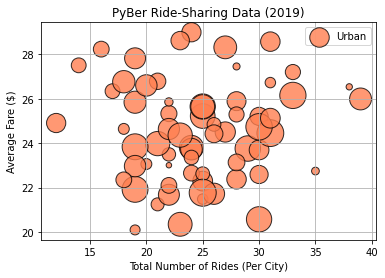

In [20]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

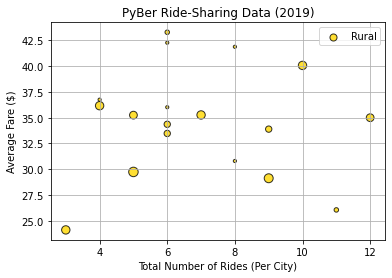

In [21]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()

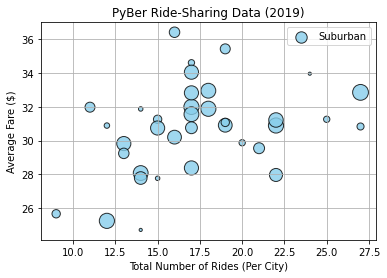

In [22]:
plt.scatter(suburban_ride_count, suburban_avg_fare,
            s = 10*suburban_driver_count, c = "skyblue",
            edgecolor = "black", linewidths = 1, alpha = 0.8,
            label = "Suburban")
plt.legend()
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.show()

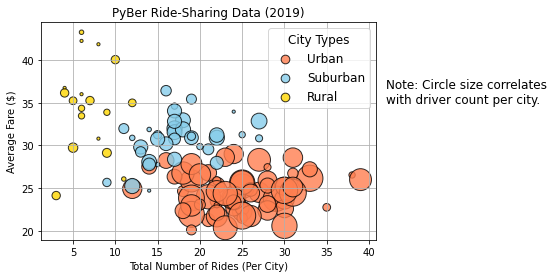

In [23]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

lgnd = plt.legend(fontsize="12", mode="Expanded", 
                 scatterpoints=1, loc="best",
                 title="City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note: Circle size correlates \nwith driver count per city.", fontsize="12")

plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.savefig("fig1.png")
plt.show()

In [24]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [25]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [26]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [27]:
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [28]:
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [29]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [30]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [31]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for ruraltrips is {mode_suburban_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for ruraltrips is {mode_rural_ride_count}.")

The mode for the ride counts for ruraltrips is ModeResult(mode=array([17]), count=array([7])).
The mode for the ride counts for ruraltrips is ModeResult(mode=array([6]), count=array([5])).


In [32]:
urban_fares = urban_cities_df["fare"]
urban_fares.describe()
sts.mode(urban_fares)

suburban_fares = suburban_cities_df["fare"]
suburban_fares.describe()
sts.mode(suburban_fares)

rural_fares = rural_cities_df["fare"]
rural_fares.describe()
sts.mode(rural_fares)

ModeResult(mode=array([37.05]), count=array([2]))

In [33]:
mean_urban_fares = round(np.mean(urban_fares),2)
print(f'{mean_urban_fares}')

median_urban_fares = round(np.median(urban_fares),2)
print(f'{median_urban_fares}')
      
mode_urban_fares = sts.mode(urban_fares)
print(f'{mode_urban_fares}')

24.53
24.64
ModeResult(mode=array([22.86]), count=array([5]))


In [34]:
urban_drivers = urban_cities_df['driver_count']
mean_urban_drivers = round(np.mean(urban_drivers),2)
print(f'{mean_urban_drivers}')

median_urban_drivers = np.median(urban_drivers)
print(f'{median_urban_fares}')
      
mode_urban_drivers = sts.mode(urban_drivers)
print(f'{mode_urban_drivers}')

36.68
24.64
ModeResult(mode=array([39]), count=array([86]))


In [35]:
suburban_drivers = suburban_cities_df['driver_count']
mean_suburban_drivers = np.mean(suburban_drivers)
print(f'{mean_suburban_drivers}')

median_suburban_drivers = np.median(suburban_drivers)
print(f'{median_suburban_drivers}')
      
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'{mode_suburban_drivers}')

13.712
16.0
ModeResult(mode=array([20]), count=array([79]))


In [36]:
rural_drivers = rural_cities_df['driver_count']
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

print(f'{mean_rural_drivers}\n {median_rural_drivers}\n {mode_rural_drivers}')

4.296
 4.0
 ModeResult(mode=array([1]), count=array([32]))


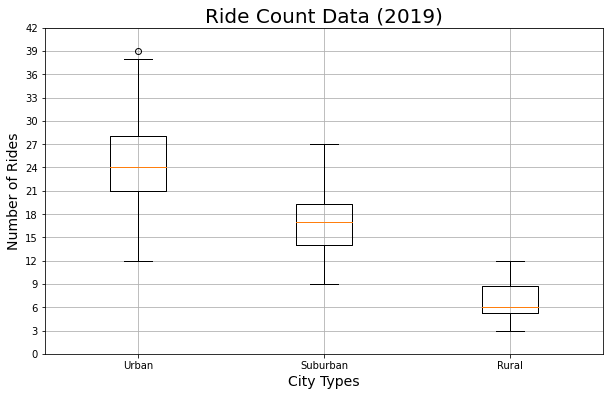

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_yticks(np.arange(0, 45.0, step = 3.0))
ax.grid()
plt.savefig("Fig2.png")
plt.show()

In [38]:
urban_ride_outlier = urban_ride_count[urban_ride_count==39]
urban_ride_outlier

city
West Angela    39
Name: ride_id, dtype: int64

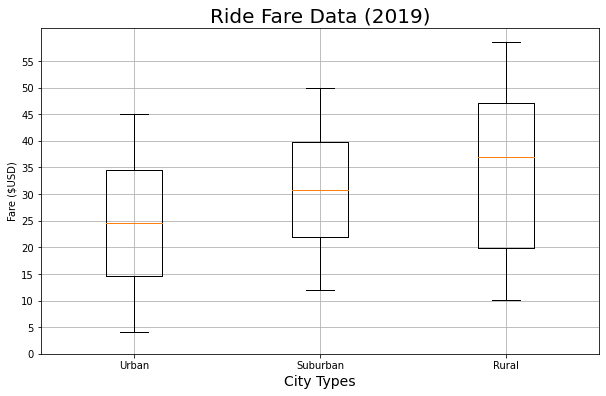

In [39]:
fig, ax = plt.subplots(figsize = (10,6))
x_labels = ["Urban", "Suburban", "Rural"]
all_fares = [urban_fares, suburban_fares, rural_fares]

ax.boxplot(all_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 56, step = 5.0))
ax.grid()
plt.savefig('Fig3.png')
plt.show()
# print("Summary Statistics")
# urban_fares.describe()

In [ ]:
#Driver count data
fig, ax = plt.subplots(figsize = (12,8))
x_labels = ["Urban", "Suburban", "Rural"]
driver_count = [urban_driver_count, suburban_driver_count, rural_driver_count]

ax.boxplot(driver_count, labels = x_labels)
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0, 76, step = 3.0))
ax.set_xlabel("Number of Drivers")
ax.grid()
plt.savefig('Fig4.png')
plt.show()


In [ ]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

In [ ]:
total_fares = pyber_data_df["fare"].sum()
total_fares

In [ ]:
type_percents = pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum() * 100
type_percents

In [ ]:
import matplotlib as mpl
plt.subplots(figsize=(8,8))
plt.pie(type_percents, labels = ["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "salmon"],
       explode = [0,0,0.2],
       autopct = "%1.1f%%",
       shadow = True,
       startangle = 150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 16
plt.savefig('analysis/Fig5.png')
plt.show()

In [ ]:
total_rides = pyber_data_df['ride_id'].count()
total_rides

In [ ]:
ride_percents = pyber_data_df.groupby(["type"]).count()["ride_id"]/total_rides * 100
ride_percents

In [ ]:
plt.subplots(figsize=(8,8))
plt.pie(ride_percents, labels = ["Rural", "Suburban", "Urban"],
       shadow = True,
       explode = [0,0,0.2],
       startangle = 150,
       autopct = "%1.1f%%",
        colors=["gold", "lightskyblue", "salmon"])
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 16
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [ ]:
total_drivers = city_data_df["driver_count"].sum()
total_drivers

In [ ]:
driver_percents = city_data_df.groupby(["type"]).sum()["driver_count"]/total_drivers * 100
driver_percents

In [ ]:
plt.subplots(figsize=(8,8))
plt.pie(driver_percents, labels = ["Rural", "Suburban", "Urban"],
        shadow = True,
        colors=["gold", "lightskyblue", "salmon"],
        autopct = "%1.1f%%",
        explode = [0,0,0.2],
        startangle = 165)
mpl.rcParams[font.size] = 16
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()